Chapter 3: Plotting and visualizing your data with `matplotlib`
===============================================================

## 介绍
[matplotlib](http://matplotlib.org/) 是一个非常强大的绘图库，用于制作出版物、个人使用甚至 Web 和桌面应用程序的惊人可视化效果。`matplotlib` 可以创建几乎任何您能想到的二维可视化，包括直方图、散点图、双变量图和图像显示。如果需要灵感，请查看 `matplotlib` 的[示例库](http://matplotlib.org/gallery.html)，其中包含生成每个示例所需的源代码。

学习 `matplotlib` 的一个很好的资源来自 [J.R. Johansson](https://github.com/jrjohansson/scientific-python-lectures)。

## matplotlib API - 状态机与面向对象
`matplotlib` 中可能最初令人困惑的一部分是它包含两种主要的绘图方法 - 面向对象方法和状态机方法。

虽然该库可以以面向对象的方式使用（即，您创建一个表示图形的对象，然后图形可以生成表示坐标轴等对象的对象），但对于 MATLAB 用户来说，最熟悉的 `matplotlib` 用法是 [`pyplot`](http://matplotlib.org/api/pyplot_api.html) 状态机环境：

来自 [matplotlib 使用 FAQ](http://matplotlib.org/faq/usage_faq.html)：

    Pyplot 的状态机环境的行为类似于 MATLAB，并且对于具有 MATLAB 经验的用户来说应该最为熟悉。
    
[Jake Vanderplas](http://jakevdp.github.io/mpl_tutorial/index.html) 提供了关于这两种用法之间区别的非常好的概述。具体来说，

+ [Pyplot 状态机](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html)
+ [面向对象](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html)

通常情况下，您只应在交互式绘制数据或为数据开发可视化时使用 `Pyplot` 状态机环境。虽然面向对象的 API 更复杂，但它是创建绘图的更强大方式，应该在开发更复杂的可视化时使用。

由于这只是对 `matplotlib` 的简要介绍，我们将使用 `Pyplot` 状态机方法来创建可视化效果。

(1) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(2) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(3) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.
(4) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(5) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(6) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(7) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.


## 图像显示

我们将从将示例图像读入 NumPy 内存数组开始，就像在[第 3 章](chapter_3_indices.ipynb)中所示。


(1) Image tutorial — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/images.html.
(2) python - How to display an image - Stack Overflow. https://stackoverflow.com/questions/35286540/how-to-display-an-image.
(3) Working with Images in Python using Matplotlib - GeeksforGeeks. https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/.

In [1]:
# 导入 Python 3 的 print 函数
from __future__ import print_function

# 从 "osgeo" 模块中导入 "gdal" 和 "gdal_array" 子模块
from osgeo import gdal
from osgeo import gdal_array

# 导入 NumPy 模块
import numpy as np

# 打开一个 GDAL 数据集
dataset = gdal.Open('../../example/LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)

# 使用第一个波段的数据类型来分配我们的数组
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# 循环遍历数据集中的所有波段
for b in range(dataset.RasterCount):
    # 注意，GDAL 的索引是从 1 开始的，而 Python 的索引是从 0 开始的 -- 因此我们在 GDAL 调用中要加 1
    band = dataset.GetRasterBand(b + 1)
    
    # 将波段的数据读取到我们数组的第三维中
    image[:, :, b] = band.ReadAsArray()

# 计算归一化植被指数（NDVI）
ndvi = (image[:, :, 3] - image[:, :, 2]) / \
        (image[:, :, 3] + image[:, :, 2]).astype(np.float64)


数据读入并计算了 NDVI，现在让我们绘制一些图表。

## 基本绘图
首先，我们需要将 `matplotlib` 导入到我们的命名空间中。我将使用 IPython 实用程序的一个特殊功能，通过输入 `%matplotlib inline` 命令来“内联” `matplotlib` 图表。您还可以尝试专为 Jupyter 笔记本设计的 `nbagg` 后端，因为该后端允许您与图表进行交互（平移、缩放等）。


(1) Image tutorial — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/images.html.
(2) python - How to display an image - Stack Overflow. https://stackoverflow.com/questions/35286540/how-to-display-an-image.
(3) Working with Images in Python using Matplotlib - GeeksforGeeks. https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/.
(4) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(5) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(6) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.
(7) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(8) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(9) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(10) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

`matplotlib` 导入后，我们可以创建一个图形并绘制我们的第一个[图表](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)：
```python
import matplotlib.pyplot as plt

# Some example data
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

# Create a simple line plot
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Plot')
plt.grid(True)
plt.show()
```
这将创建一个简单的折线图，显示了一些示例数据。

(1) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(2) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(3) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.
(4) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(5) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(6) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(7) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.

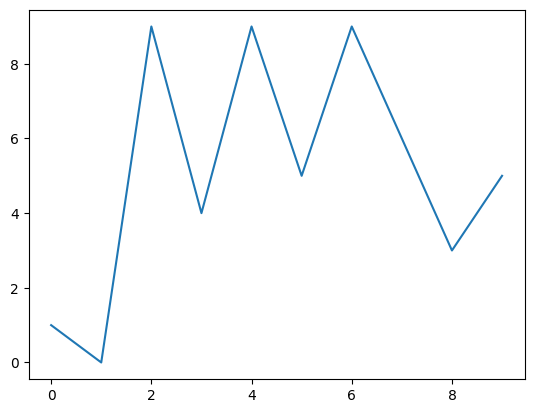

In [3]:
# Array of 0 - 9
x = np.arange(10)
# 10 random numbers, between 0 and 10
y = np.random.randint(0, 10, size=10)

# plot them as lines
plt.plot(x, y)

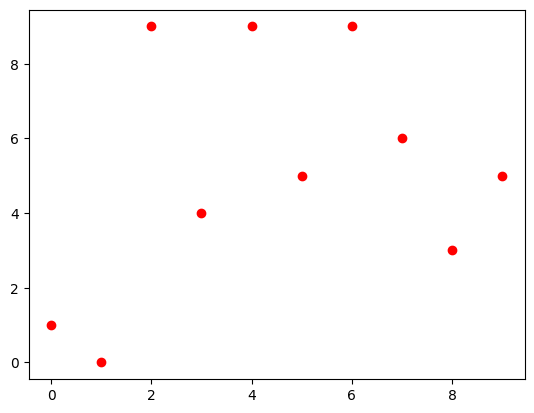

In [4]:
# plot them as just points -- specify "ls" ("linestyle") as a null string
plt.plot(x, y, 'ro', ls='')

## 绘制 2D 数组

我们通常希望做的一件事是绘制一个波段与另一个波段之间的关系。为了实现这一点，我们需要将每个波段值的 2 维数组转换或“展平”为 1 维数组：
```python
# Flatten the 2D arrays
red_flat = red_band.flatten()
nir_flat = nir_band.flatten()

# Create a scatter plot
plt.scatter(red_flat, nir_flat, color='b', marker='o', alpha=0.5)
plt.xlabel('Red Band')
plt.ylabel('NIR Band')
plt.title('Scatter Plot: Red vs. NIR')
plt.grid(True)
plt.show()
```
这将创建一个散点图，显示了红色波段与近红外波段之间的关系。


(1) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(2) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(3) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(4) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.
(5) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(6) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(7) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.

In [5]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 3].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print('Array shape after: {shp} (size is {sz})'.format(shp=nir.shape, sz=nir.size))

Array shape before: (250, 250) (size is 62500)
Array shape after: (62500,) (size is 62500)


我们保留了每个栅格波段中的条目数，但将它们从 2 维展平为 1 维。

现在我们可以绘制它们了。由于我们只想要点，我们可以使用 `scatter` 来绘制[散点图](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)。由于散点图中没有线条，因此它的语法略有不同。
```python
# Flatten the 2D arrays
red_flat = red_band.flatten()
nir_flat = nir_band.flatten()

# Create a scatter plot
plt.scatter(red_flat, nir_flat, color='b', marker='o', alpha=0.5)
plt.xlabel('Red Band')
plt.ylabel('NIR Band')
plt.title('Scatter Plot: Red vs. NIR')
plt.grid(True)
plt.show()
```
这将创建一个散点图，显示了红色波段与近红外波段之间的关系。

(1) seaborn.scatterplot — seaborn 0.13.2 documentation. https://seaborn.pydata.org/generated/seaborn.scatterplot.html.
(2) R - Scatterplots - Online Tutorials Library. https://www.tutorialspoint.com/r/r_scatterplots.htm.
(3) pandas.DataFrame.plot.scatter — pandas 2.2.1 documentation. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html.
(4) Python Machine Learning Scatter Plot - W3Schools. https://www.w3schools.com/python/python_ml_scatterplot.asp.

Text(0.5, 1.0, 'Tasseled Cap, eh?')

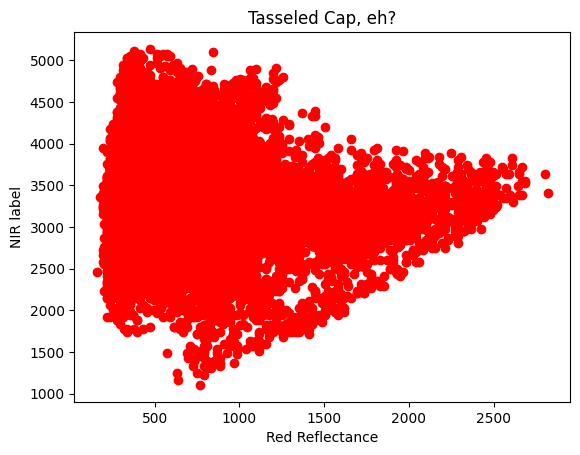

In [7]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

如果我们想让两个轴有相同的极限，我们可以计算极限并应用它们

Text(0.5, 1.0, 'Tasseled Cap, eh?')

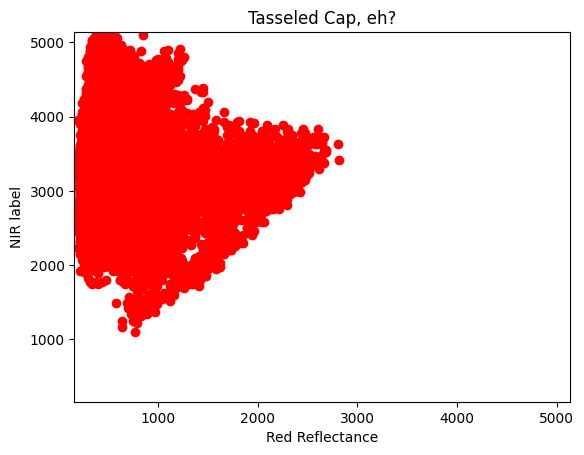

In [9]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Calculate min and max
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

plt.xlim((plot_min, plot_max))
plt.ylim((plot_min, plot_max))

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

## 绘制 2D 数组 - 图像

由于有这么多数据可供查看，很难理解上面显示的一堆点的情况。幸运的是，我们的数据集不仅仅是一堆点 - 它们具有空间结构。

为了显示图像的空间结构，我们可以使用 `imshow` 来绘制一个波段的图像，将其[显示在坐标轴上](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow)：
```python
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image data into a Numpy array
img = np.asarray(Image.open('../../doc/_static/stinkbug.png'))

# Display the image using imshow
plt.imshow(img)
plt.title('Sample Image')
plt.axis('off')  # Turn off axis labels
plt.show()
```
这将显示一个示例图像，展示了图像的空间结构。

(1) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(2) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(3) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.
(4) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(5) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(6) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(7) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.
(8) Image tutorial — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/images.html.
(9) python - How to display an image - Stack Overflow. https://stackoverflow.com/questions/35286540/how-to-display-an-image.
(10) Working with Images in Python using Matplotlib - GeeksforGeeks. https://www.geeksforgeeks.org/working-with-images-in-python-using-matplotlib/.

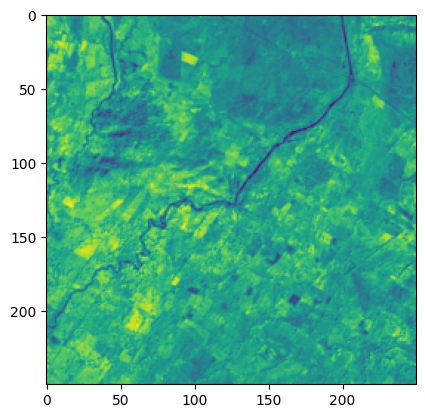

In [11]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])

嗯，看起来有一些东西正在发生 - 可能是中心的一条河流，以及图像左下角的一些明亮的植被。缺少的是对颜色含义的任何了解。

幸运的是，`matplotlib` 可以为我们提供一个[颜色条](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colorbar)。

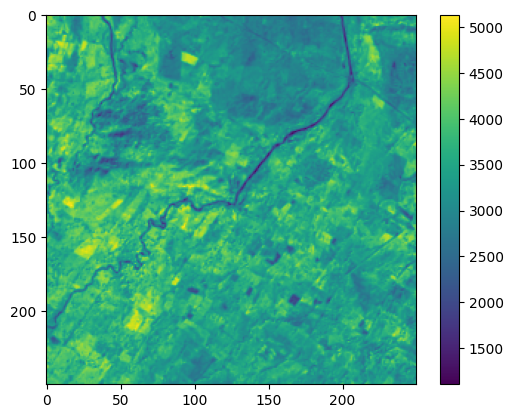

In [13]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])
plt.colorbar()

如果我们想要一个灰度图像，我们可以手动指定一个[颜色映射](https://matplotlib.org/stable/api/colors_api.html)：
```python
# Display the image in greyscale
plt.imshow(img, cmap='gray')
plt.title('Greyscale Image')
plt.axis('off')  # Turn off axis labels
plt.show()
```

(1) Choosing Colormaps in Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/colors/colormaps.html.
(2) Colors — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/colors/index.html.
(3) Customized Colorbars Tutorial — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/colors/colorbar_only.html.
(4) Erstellen von Colormaps in Matplotlib_Matplotlib-Visualisierung mit Python. https://de.matplotlib.net/stable/tutorials/colors/colormap-manipulation.html.
(5) Creating Colormaps in Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html.
(6) Tutorials — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/tutorials/index.html.
(7) GitHub - rougier/matplotlib-tutorial: Matplotlib tutorial for beginner. https://github.com/rougier/matplotlib-tutorial.
(8) Quick start guide — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/explain/quick_start.html.
(9) Matplotlib Tutorial - W3Schools. https://www.w3schools.com/python/matplotlib_intro.asp.
(10) API Reference — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/api/index.html.
(11) Using Matplotlib — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/users/index.html.
(12) Matplotlib documentation — Matplotlib 3.8.3 documentation. https://matplotlib.org/stable/index.html.

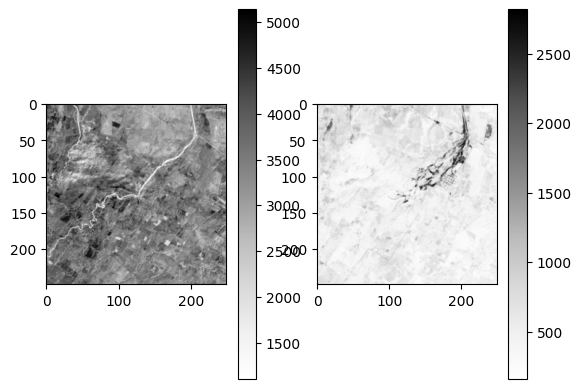

In [15]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(121)
plt.imshow(image[:, :, 3], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by last of the 3 numbers)
plt.subplot(122)
plt.imshow(image[:, :, 2], cmap=plt.cm.Greys)
plt.colorbar()

## 绘制3D数组 - 多光谱图像

灰度图像很好，但我们可以从不同波段之间的相互作用中获得的信息最丰富。为了实现这一点，我们可以将不同的光谱波段映射到显示器上的红色、绿色和蓝色通道。

在此之前，`matplotlib` 的 `imshow` 帮助文档告诉我们，我们需要将我们的波段归一化到0-1的范围内。为此，我们将执行一个简单的线性缩放，将0反射率映射到0，80%反射率映射到1，将大于或小于这些值的部分截断。

    请记住：

    如果我们从Int16数据类型（例如，经过10,000倍缩放的反射率）转换为0到1之间的小数，我们需要使用Float！


(1) Reshape multi-temporal, mutlispectral 3D numpy arrays. https://stackoverflow.com/questions/70712449/reshape-multi-temporal-mutlispectral-3d-numpy-arrays.
(2) [2401.09428] Multispectral Stereo-Image Fusion for 3D Hyperspectral .... https://arxiv.org/abs/2401.09428.
(3) Deep Learning-Driven Terahertz System Captures Multispectral Images in .... https://www.photonics.com/Articles/Deep_Learning-Driven_Terahertz_System_Captures/a69669.
(4) [2303.01661] Longwave infrared multispectral image sensor system using .... https://arxiv.org/abs/2303.01661.
(5) Multispectral Stereo-Image Fusion for 3D Hyperspectral Scene Reconstruction. https://arxiv.org/html/2401.09428v1.

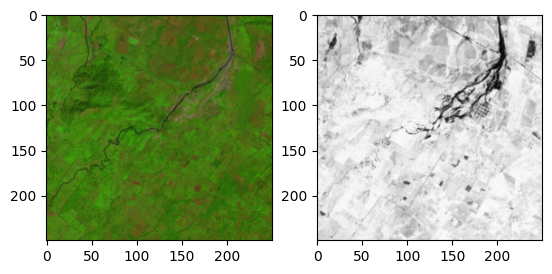

In [17]:
# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)

## 总结

我们已经了解了如何将matplotlib与NumPy和GDAL结合使用，轻松可视化和探索遥感数据。在下一章中（链接到[网页](chapter_3_vector.html)或[Notebook](chapter_3_vector.ipynb)），我们将介绍如何使用GDAL的伴随库 - OGR - 打开和读取矢量数据。